In [1]:
import pandas as pd
import os
import additional.add_path as pathes
import additional.add_regr as regr
import additional.add_graphics as graphs

In [2]:
file_path = os.path.join(pathes.output_mri_ct_path, '04_мрт.кт.3_0T.xlsx')
df_90 = pd.read_excel(file_path, sheet_name='04_мрт.кт.3_0T_(HU>60)', header=0)
df_14 = pd.read_excel(file_path, sheet_name='04_мрт.кт.3_0T_(HU>60)_(разн_дн_мрт_кт<=14)', header=0)

In [3]:
df_90.columns, df_14.columns

(Index(['T2*_3.0T_(мс)_protocol', 'кт_ср_(HU)', 'разн_дней_мрт_кт',
        'c(Fe)_3.0T_(мг/г)_protocol', 'диагноз', 'R2*_3.0T_(1/c)',
        'C(Fe)_3.0T_formula, мг/г'],
       dtype='object'),
 Index(['T2*_3.0T_(мс)_protocol', 'кт_ср_(HU)', 'разн_дней_мрт_кт',
        'c(Fe)_3.0T_(мг/г)_protocol', 'диагноз', 'R2*_3.0T_(1/c)',
        'C(Fe)_3.0T_formula, мг/г'],
       dtype='object'))

# Распределение по диагнозам

In [4]:
df_90['диагноз'].value_counts()

Приобртенн. апластич. анемия    9
Бета-талассемия (б)             9
Анемия Даймонда- Блэкфана       3
Анемия Фанкони                  2
Агранулоцитоз                   2
Идиопатич. апластич. Анемия     2
ПИД                             2
Бета-талассемия (п)             1
Констит. апластич. анемия       1
Онкология                       1
Приобртенн. апластич. Анемия    1
Name: диагноз, dtype: int64

In [5]:
df_14['диагноз'].value_counts()

Бета-талассемия (б)             4
Приобртенн. апластич. анемия    3
Идиопатич. апластич. Анемия     2
Анемия Даймонда- Блэкфана       2
Анемия Фанкони                  1
Бета-талассемия (п)             1
Констит. апластич. анемия       1
Агранулоцитоз                   1
Name: диагноз, dtype: int64

In [6]:
# Запись распределение диагнозов в файл
file_path = os.path.join(pathes.output_mri_ct_path, '04_мрт.кт.3_0T_диагнозы.xlsx')
with pd.ExcelWriter(file_path) as writer:
    df_90['диагноз'].value_counts().to_excel(writer, sheet_name='04_мрт.кт.3_0T_диагнозы_90_дней')
    df_14['диагноз'].value_counts().to_excel(writer, sheet_name='04_мрт.кт.3_0T_диагнозы_14_дней')

In [7]:
df_90.head(10)

,T2*_3.0T_(мс)_protocol,кт_ср_(HU),разн_дней_мрт_кт,c(Fe)_3.0T_(мг/г)_protocol,диагноз,R2*_3.0T_(1/c),"C(Fe)_3.0T_formula, мг/г"
0,5.72,61.814444,43,0.63,Приобртенн. апластич. анемия,174.825175,3.337902
1,2.70,62.411556,36,3.80,Приобртенн. апластич. анемия,370.370370,5.684444
2,4.10,64.245222,58,1.75,Приобртенн. апластич. анемия,243.902439,4.166829
3,1.90,71.450333,51,7.60,Онкология,526.315789,7.555789
4,0.87,71.475500,20,15.00,Анемия Фанкони,1149.425287,15.033103
5,0.96,71.544889,80,14.80,Приобртенн. апластич. анемия,1041.666667,13.740000
6,3.30,71.705333,78,2.70,Агранулоцитоз,303.030303,4.876364
7,3.40,71.705333,4,3.40,Агранулоцитоз,294.117647,4.769412
8,2.01,72.182875,3,7.20,Приобртенн. апластич. анемия,497.512438,7.210149
9,3.10,73.401667,7,3.00,Констит. апластич. анемия,322.580645,5.110968


In [8]:
df_14.head(10)

,T2*_3.0T_(мс)_protocol,кт_ср_(HU),разн_дней_мрт_кт,c(Fe)_3.0T_(мг/г)_protocol,диагноз,R2*_3.0T_(1/c),"C(Fe)_3.0T_formula, мг/г"
0,3.40,71.705333,4,3.4,Агранулоцитоз,294.117647,4.769412
1,2.01,72.182875,3,7.2,Приобртенн. апластич. анемия,497.512438,7.210149
2,3.10,73.401667,7,3.0,Констит. апластич. анемия,322.580645,5.110968
3,1.10,82.644667,7,12.2,Бета-талассемия (б),909.090909,12.149091
4,0.91,83.980222,3,14.4,Идиопатич. апластич. Анемия,1098.901099,14.426813
5,0.76,85.972000,6,15.5,Анемия Даймонда- Блэкфана,1315.789474,17.029474
6,0.68,87.336111,7,18.9,Бета-талассемия (б),1470.588235,18.887059
7,2.30,87.357889,1,6.5,Бета-талассемия (п),434.782609,6.457391
8,0.85,87.773556,0,15.4,Идиопатич. апластич. Анемия,1176.470588,15.357647
9,0.86,91.539444,14,21.9,Бета-талассемия (б),1162.790698,15.193488


In [8]:
df_90_comp_c = regr.comparison_regr_df(df_90['R2*_3.0T_(1/c)'], df_90['кт_ср_(HU)'])
df_14_comp_c = regr.comparison_regr_df(df_14['R2*_3.0T_(1/c)'], df_14['кт_ср_(HU)'])

In [11]:
df_90_comp_c

,name,eq,std_se,r2,err
0,lin,y = -1997.040 + 34.5*(x),374.663503,0.558089,49.727328
2,pow,y = 0.000157 * x^(3.47),382.778013,0.538740,42.938481
3,hyp,y = 3606.85 * -223045.80/x,395.065536,0.508651,57.398422
1,exp,y = 22.167802 * 1.04^x,395.991337,0.506345,43.416511


In [13]:
df_14_comp_c

,name,eq,std_se,r2,err
3,hyp,y = 4664.79 * -311480.09/x,371.068545,0.643276,31.558056
0,lin,y = -2408.673 + 39.5*(x),374.362807,0.636914,34.224196
2,pow,y = 0.000034 * x^(3.82),422.841952,0.536787,35.683059
1,exp,y = 22.530844 * 1.04^x,451.959164,0.470796,37.013560


проблема с файлом file path: 


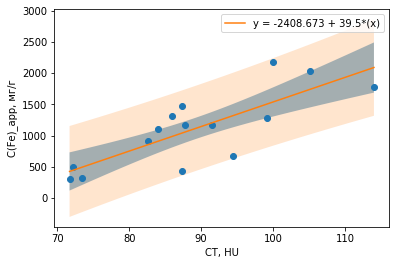

In [14]:
y, x = df_14['R2*_3.0T_(1/c)'], df_14['кт_ср_(HU)']
graphs.plot_graph_conf_int_2(y, x, 'lin', x_label='CT, HU', y_label='C(Fe)_app, мг/г')

In [15]:
df_90_comp = regr.comparison_regr_df(df_90['R2*_3.0T_(1/c)'], df_90['кт_ср_(HU)'])

In [16]:
df_14_comp = regr.comparison_regr_df(df_14['R2*_3.0T_(1/c)'], df_14['кт_ср_(HU)'])

In [17]:
df_14_comp

,name,eq,std_se,r2,err
3,hyp,y = 4664.79 * -311480.09/x,371.068545,0.643276,31.558056
0,lin,y = -2408.673 + 39.5*(x),374.362807,0.636914,34.224196
2,pow,y = 0.000034 * x^(3.82),422.841952,0.536787,35.683059
1,exp,y = 22.530844 * 1.04^x,451.959164,0.470796,37.013560


In [18]:
df_90_comp

,name,eq,std_se,r2,err
0,lin,y = -1997.040 + 34.5*(x),374.663503,0.558089,49.727328
2,pow,y = 0.000157 * x^(3.47),382.778013,0.538740,42.938481
3,hyp,y = 3606.85 * -223045.80/x,395.065536,0.508651,57.398422
1,exp,y = 22.167802 * 1.04^x,395.991337,0.506345,43.416511


In [19]:
file_path = os.path.join(pathes.output_mri_ct_path, '05_comparison_regression_3.0T.xlsx')
with pd.ExcelWriter(file_path) as writer:
    df_14_comp.to_excel(writer, sheet_name='comparison_3_0T.14_days', index=False)
    df_90_comp.to_excel(writer, sheet_name='comparison_3_0T.90_days', index=False)

# Уравнение линейной регрессии для 3.0T 

Независимая переменная значения HU. 
Зависимая переменная значение концентрации методом МРТ. 



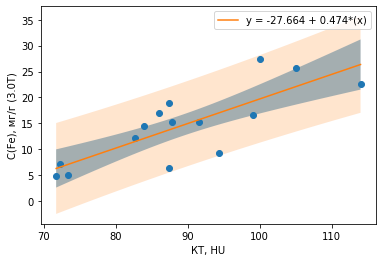

Проверка значимости коээфициента детерминации. Используется F-критерий Фишера.
lin approximation
y = -27.664 + 0.474*(x)
Стандартная ошибка регреесси Se = 4.492
Коэффициент детерминации R2 = 0.64
Средняя относительная ошибка Ei = 29.10

Оценка значимости параметров уравнения регрессии с помощью t-критерия Стьюдента (p=0.01)
Стандартные ошибки параметров линейной регрессии:
std_a = : 8.915. Стандартное отклонение коэффициента регрессии a (y = a+bx, intercept)
std_b = : 0.099. Стандартное отклонение коэффициента регрессии b (y = a+bx, intercept)
t_a = 3.10
t_b = 4.78
t_кр = 2.65 (для односторонней области)
a = -27.66 ± 23.63
Доверительный интервал a = [-51.29, -4.04]
b = 0.47 ± 0.26
Доверительный интервал b = [0.21, 0.74]
Если в границы оценки параметров регресии не попадает 0, то параметры a и b ститистически значимы.

Проверка значимости коээфициента детерминации. Используется F-критерий Фишера (p=0.01).
f > f_кр
Уравнение регрессии признается значимым (нулевая гипотеза отстутсвия связ

In [20]:
import additional.add_regr as regr
y, x = df_14['C(Fe)_3.0T_formula, мг/г'], df_14['кт_ср_(HU)']
file_path = os.path.join(pathes.output_mri_ct_path, '06_lin_regr_c_from_HU_3_0T.svg')
graphs.plot_graph_conf_int_2(y, x, 'lin', x_label='КТ, HU', y_label='C(Fe), мг/г (3.0T)', file_path=file_path)
regr_lin = regr.LinRegression(y, x)
regr_lin.output_description(alpha=0.01)

Оценка доверительных интервалов.

In [21]:
concentr_list = [2, 7, 15]
a = regr_lin.a
b = regr_lin.b
func_c_hu = lambda hu: a + b * hu
func_hu_c = lambda c: (c - a) / b
hu_list = list(map(func_hu_c, concentr_list))
print(hu_list)
hu_up_ind_list = list(map(lambda x: regr_lin.conf_int.get_ind_app_up_x(x), hu_list))
hu_low_ind_list = list(map(lambda x: regr_lin.conf_int.get_ind_app_low_x(x), hu_list))
print(hu_up_ind_list)
print(hu_low_ind_list)

import scipy.optimize as bisect
func = lambda x: regr_lin.conf_int.get_ind_app_low_x(x) - 2
hu_concetnr_2 = bisect.bisect(func, min(x), max(x))
hu_concetnr_2
print('Значение HU_L = {}. При этом значении нижняя граница доверительного интервала равна 2 мг[Fe]/г'.format(hu_concetnr_2))
func_c_hu(hu_concetnr_2), regr_lin.conf_int.get_ind_app_up_x(hu_concetnr_2), regr_lin.conf_int.get_ind_app_low_x(hu_concetnr_2)

[62.61824725052543, 73.172805838192, 90.06009957845853]
[11.442309684925798, 15.679974254678624, 23.218298588304137]
[-7.442309684925798, -1.6799742546786245, 6.781701411695865]
Значение HU_L = 80.2692014598241. При этом значении нижняя граница доверительного интервала равна 2 мг[Fe]/г


(10.36176807522984, 18.723536150460205, 1.9999999999994742)

# Проверка выполнений условий Гаусса-Маркова

1) Оценка. Случайность остаточной компоненты.
Количество поворотных точке p = 7
Значение критических точек p_кр = 5
Остатки имеют случайный характер (p > p_кр)

2) Оценка. M(e_ср) = 0. Равенство нулю  метематического ожидания средней величины остаточной компоненты.
e_ср = -1.3618735768735254e-15
t_кр = 1.7613101357748562
t_расч = 1.1741091760227669e-15
Оценка средней величины остатков равной нулю ПОДТВЕРЖДАЕТСЯ (t_расч < t_кр)

3) Оценка. Var(e_i) = const. Постоянство дисперсии случайного члена e_i во всех наблюдениях. 

Тест. Голдфелда-Квандта. Goldfeld-Quandt test.
НЕ наблюдается гомоскедатичность отстатков
F_расчетное = 26.897571988355946, F_критическое = 6.388232908695868

Тест ранговой корреляции Спирмена.
t_расч < t_крит. Коффициента ранговой корреляции Спирмена статитстически НЕ значим.
Гетероскедатичность остатков отсутствует.
t_расч = 0.19343229752452318 , t_крит = 2.1603686564610127

4) Оценка. Cov(e_i, e_j)=0, i<>j. Отсутствие автокоррелямции межуд значенимяи  ошибок e_i(ост

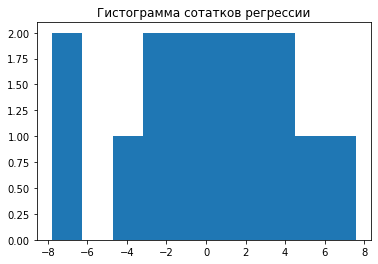

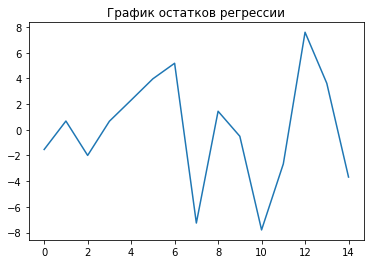

In [9]:
y, x = df_14['C(Fe)_3.0T_formula, мг/г'], df_14['кт_ср_(HU)']

lin_regr = regr.LinRegression(y, x)

gm_condition = regr.Gauss_Markov(y.to_numpy(), lin_regr.y_ap, x.to_numpy())
gm_condition.output_condition_description()
gm_condition.plot_residual()